# Santander Customer Satisfaction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/test.csv
/kaggle/input/santander-customer-satisfaction/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
cust_df = pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv',encoding='latin-1')
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

unsatisfied 비율은 0.04


In [6]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [10]:
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.880

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.71637	validation_1-auc:0.72122
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81667	validation_1-auc:0.82080
[2]	validation_0-auc:0.81000	validation_1-auc:0.80797
[3]	validation_0-auc:0.82332	validation_1-auc:0.82217
[4]	validation_0-auc:0.83181	validation_1-auc:0.82882
[5]	validation_0-auc:0.82935	validation_1-auc:0.82418
[6]	validation_0-auc:0.82908	validation_1-auc:0.82355
[7]	validation_0-auc:0.83956	validation_1-auc:0.83139
[8]	validation_0-auc:0.84448	validation_1-auc:0.83360
[9]	validation_0-auc:0.84482	validation_1-auc:0.83160
[10]	validation_0-auc:0.85138	validation_1-auc:0.83624
[11]	validation_0-auc:0.85383	validation_1-auc:0.83745
[12]	validation_0-auc:0.85630	validation_1-auc:0.83870
[13]	validation_0-auc:0.85803	validation_1-auc:0.83806
[14]	validation_0-auc:0.85968	validation_1-auc:0.83747
[15]	validation_0-auc:0.8611

[45]	validation_0-auc:0.88390	validation_1-auc:0.83915
[46]	validation_0-auc:0.88402	validation_1-auc:0.83925
[47]	validation_0-auc:0.88467	validation_1-auc:0.83895
[48]	validation_0-auc:0.88505	validation_1-auc:0.83867
[49]	validation_0-auc:0.88532	validation_1-auc:0.83881
[50]	validation_0-auc:0.88575	validation_1-auc:0.83839
[51]	validation_0-auc:0.88653	validation_1-auc:0.83864
[52]	validation_0-auc:0.88671	validation_1-auc:0.83867
[53]	validation_0-auc:0.88687	validation_1-auc:0.83825
[54]	validation_0-auc:0.88755	validation_1-auc:0.83807
[55]	validation_0-auc:0.88788	validation_1-auc:0.83777
[56]	validation_0-auc:0.88869	validation_1-auc:0.83779
Stopping. Best iteration:
[26]	validation_0-auc:0.87262	validation_1-auc:0.84394

[0]	validation_0-auc:0.71000	validation_1-auc:0.71605
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81240	validation_1-auc:0

[11]	validation_0-auc:0.85355	validation_1-auc:0.84099
[12]	validation_0-auc:0.85633	validation_1-auc:0.84194
[13]	validation_0-auc:0.85770	validation_1-auc:0.84140
[14]	validation_0-auc:0.85874	validation_1-auc:0.84101
[15]	validation_0-auc:0.86020	validation_1-auc:0.84125
[16]	validation_0-auc:0.86199	validation_1-auc:0.84168
[17]	validation_0-auc:0.86333	validation_1-auc:0.84146
[18]	validation_0-auc:0.86436	validation_1-auc:0.84102
[19]	validation_0-auc:0.86521	validation_1-auc:0.84127
[20]	validation_0-auc:0.86628	validation_1-auc:0.84131
[21]	validation_0-auc:0.86664	validation_1-auc:0.84171
[22]	validation_0-auc:0.86692	validation_1-auc:0.84188
[23]	validation_0-auc:0.86778	validation_1-auc:0.84156
[24]	validation_0-auc:0.86838	validation_1-auc:0.84223
[25]	validation_0-auc:0.86962	validation_1-auc:0.84163
[26]	validation_0-auc:0.87015	validation_1-auc:0.84150
[27]	validation_0-auc:0.87069	validation_1-auc:0.84116
[28]	validation_0-auc:0.87157	validation_1-auc:0.84123
[29]	valid

[40]	validation_0-auc:0.87541	validation_1-auc:0.84186
[41]	validation_0-auc:0.87576	validation_1-auc:0.84179
[42]	validation_0-auc:0.87589	validation_1-auc:0.84219
[43]	validation_0-auc:0.87633	validation_1-auc:0.84193
[44]	validation_0-auc:0.87764	validation_1-auc:0.84120
[45]	validation_0-auc:0.87780	validation_1-auc:0.84089
[46]	validation_0-auc:0.87814	validation_1-auc:0.84076
Stopping. Best iteration:
[16]	validation_0-auc:0.86229	validation_1-auc:0.84436

[0]	validation_0-auc:0.72420	validation_1-auc:0.72803
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81944	validation_1-auc:0.81883
[2]	validation_0-auc:0.81367	validation_1-auc:0.81598
[3]	validation_0-auc:0.82820	validation_1-auc:0.82949
[4]	validation_0-auc:0.83396	validation_1-auc:0.83132
[5]	validation_0-auc:0.83077	validation_1-auc:0.82733
[6]	validation_0-auc:0.82948	validation_1-auc:0.8249

[21]	validation_0-auc:0.89180	validation_1-auc:0.83770
[22]	validation_0-auc:0.89223	validation_1-auc:0.83712
[23]	validation_0-auc:0.89277	validation_1-auc:0.83707
[24]	validation_0-auc:0.89316	validation_1-auc:0.83769
[25]	validation_0-auc:0.89411	validation_1-auc:0.83787
[26]	validation_0-auc:0.89468	validation_1-auc:0.83768
[27]	validation_0-auc:0.89523	validation_1-auc:0.83751
[28]	validation_0-auc:0.89605	validation_1-auc:0.83671
[29]	validation_0-auc:0.89640	validation_1-auc:0.83627
[30]	validation_0-auc:0.89653	validation_1-auc:0.83618
[31]	validation_0-auc:0.89704	validation_1-auc:0.83585
[32]	validation_0-auc:0.89728	validation_1-auc:0.83626
[33]	validation_0-auc:0.89751	validation_1-auc:0.83641
[34]	validation_0-auc:0.89783	validation_1-auc:0.83619
[35]	validation_0-auc:0.89824	validation_1-auc:0.83579
[36]	validation_0-auc:0.89834	validation_1-auc:0.83576
[37]	validation_0-auc:0.89852	validation_1-auc:0.83580
[38]	validation_0-auc:0.89869	validation_1-auc:0.83592
[39]	valid

[16]	validation_0-auc:0.88616	validation_1-auc:0.84360
[17]	validation_0-auc:0.88713	validation_1-auc:0.84348
[18]	validation_0-auc:0.88855	validation_1-auc:0.84395
[19]	validation_0-auc:0.89010	validation_1-auc:0.84379
[20]	validation_0-auc:0.89104	validation_1-auc:0.84312
[21]	validation_0-auc:0.89245	validation_1-auc:0.84308
[22]	validation_0-auc:0.89266	validation_1-auc:0.84278
[23]	validation_0-auc:0.89359	validation_1-auc:0.84303
[24]	validation_0-auc:0.89376	validation_1-auc:0.84321
[25]	validation_0-auc:0.89509	validation_1-auc:0.84288
[26]	validation_0-auc:0.89555	validation_1-auc:0.84229
[27]	validation_0-auc:0.89590	validation_1-auc:0.84230
[28]	validation_0-auc:0.89676	validation_1-auc:0.84148
[29]	validation_0-auc:0.89804	validation_1-auc:0.84055
[30]	validation_0-auc:0.89896	validation_1-auc:0.83984
[31]	validation_0-auc:0.89903	validation_1-auc:0.83996
[32]	validation_0-auc:0.89971	validation_1-auc:0.83965
[33]	validation_0-auc:0.90028	validation_1-auc:0.83998
[34]	valid

[50]	validation_0-auc:0.89874	validation_1-auc:0.83751
[51]	validation_0-auc:0.89956	validation_1-auc:0.83738
[52]	validation_0-auc:0.90037	validation_1-auc:0.83714
[53]	validation_0-auc:0.90057	validation_1-auc:0.83715
[54]	validation_0-auc:0.90070	validation_1-auc:0.83717
[55]	validation_0-auc:0.90085	validation_1-auc:0.83730
[56]	validation_0-auc:0.90136	validation_1-auc:0.83784
[57]	validation_0-auc:0.90170	validation_1-auc:0.83789
[58]	validation_0-auc:0.90248	validation_1-auc:0.83778
[59]	validation_0-auc:0.90247	validation_1-auc:0.83755
Stopping. Best iteration:
[29]	validation_0-auc:0.88901	validation_1-auc:0.84106

[0]	validation_0-auc:0.74582	validation_1-auc:0.74973
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82443	validation_1-auc:0.81667
[2]	validation_0-auc:0.81850	validation_1-auc:0.81269
[3]	validation_0-auc:0.83495	validation_1-auc:0.8

[6]	validation_0-auc:0.84355	validation_1-auc:0.82984
[7]	validation_0-auc:0.85128	validation_1-auc:0.83560
[8]	validation_0-auc:0.85791	validation_1-auc:0.83791
[9]	validation_0-auc:0.85925	validation_1-auc:0.83618
[10]	validation_0-auc:0.86447	validation_1-auc:0.83961
[11]	validation_0-auc:0.86884	validation_1-auc:0.84095
[12]	validation_0-auc:0.87074	validation_1-auc:0.84299
[13]	validation_0-auc:0.87167	validation_1-auc:0.84173
[14]	validation_0-auc:0.87292	validation_1-auc:0.84290
[15]	validation_0-auc:0.87511	validation_1-auc:0.84474
[16]	validation_0-auc:0.87722	validation_1-auc:0.84571
[17]	validation_0-auc:0.87909	validation_1-auc:0.84628
[18]	validation_0-auc:0.88033	validation_1-auc:0.84541
[19]	validation_0-auc:0.88052	validation_1-auc:0.84542
[20]	validation_0-auc:0.88189	validation_1-auc:0.84476
[21]	validation_0-auc:0.88370	validation_1-auc:0.84416
[22]	validation_0-auc:0.88387	validation_1-auc:0.84407
[23]	validation_0-auc:0.88435	validation_1-auc:0.84381
[24]	validatio

[4]	validation_0-auc:0.83775	validation_1-auc:0.83014
[5]	validation_0-auc:0.84075	validation_1-auc:0.83093
[6]	validation_0-auc:0.84467	validation_1-auc:0.83488
[7]	validation_0-auc:0.84782	validation_1-auc:0.83653
[8]	validation_0-auc:0.85040	validation_1-auc:0.83817
[9]	validation_0-auc:0.85225	validation_1-auc:0.83957
[10]	validation_0-auc:0.85348	validation_1-auc:0.83878
[11]	validation_0-auc:0.85528	validation_1-auc:0.83852
[12]	validation_0-auc:0.85792	validation_1-auc:0.83908
[13]	validation_0-auc:0.86108	validation_1-auc:0.84071
[14]	validation_0-auc:0.86281	validation_1-auc:0.84112
[15]	validation_0-auc:0.86393	validation_1-auc:0.84179
[16]	validation_0-auc:0.86484	validation_1-auc:0.84094
[17]	validation_0-auc:0.86633	validation_1-auc:0.84091
[18]	validation_0-auc:0.86731	validation_1-auc:0.84057
[19]	validation_0-auc:0.86827	validation_1-auc:0.84050
[20]	validation_0-auc:0.86939	validation_1-auc:0.84101
[21]	validation_0-auc:0.86999	validation_1-auc:0.84105
[22]	validation_

[28]	validation_0-auc:0.87425	validation_1-auc:0.84246
[29]	validation_0-auc:0.87467	validation_1-auc:0.84211
[30]	validation_0-auc:0.87547	validation_1-auc:0.84215
[31]	validation_0-auc:0.87553	validation_1-auc:0.84205
[32]	validation_0-auc:0.87577	validation_1-auc:0.84169
[33]	validation_0-auc:0.87608	validation_1-auc:0.84173
[34]	validation_0-auc:0.87673	validation_1-auc:0.84124
[35]	validation_0-auc:0.87737	validation_1-auc:0.84164
[36]	validation_0-auc:0.87879	validation_1-auc:0.84184
[37]	validation_0-auc:0.87952	validation_1-auc:0.84184
[38]	validation_0-auc:0.87976	validation_1-auc:0.84175
[39]	validation_0-auc:0.88007	validation_1-auc:0.84181
[40]	validation_0-auc:0.88031	validation_1-auc:0.84168
[41]	validation_0-auc:0.88052	validation_1-auc:0.84149
[42]	validation_0-auc:0.88132	validation_1-auc:0.84166
[43]	validation_0-auc:0.88165	validation_1-auc:0.84131
[44]	validation_0-auc:0.88177	validation_1-auc:0.84135
[45]	validation_0-auc:0.88292	validation_1-auc:0.84191
[46]	valid

[51]	validation_0-auc:0.88177	validation_1-auc:0.83725
[52]	validation_0-auc:0.88229	validation_1-auc:0.83736
[53]	validation_0-auc:0.88241	validation_1-auc:0.83784
[54]	validation_0-auc:0.88255	validation_1-auc:0.83750
[55]	validation_0-auc:0.88306	validation_1-auc:0.83736
Stopping. Best iteration:
[25]	validation_0-auc:0.87026	validation_1-auc:0.84113

[0]	validation_0-auc:0.81453	validation_1-auc:0.81253
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82597	validation_1-auc:0.81893
[2]	validation_0-auc:0.82747	validation_1-auc:0.82330
[3]	validation_0-auc:0.83588	validation_1-auc:0.83066
[4]	validation_0-auc:0.83825	validation_1-auc:0.83114
[5]	validation_0-auc:0.84066	validation_1-auc:0.83104
[6]	validation_0-auc:0.84463	validation_1-auc:0.83394
[7]	validation_0-auc:0.84641	validation_1-auc:0.83530
[8]	validation_0-auc:0.84883	validation_1-auc:0.83845


[31]	validation_0-auc:0.87079	validation_1-auc:0.84129
[32]	validation_0-auc:0.87129	validation_1-auc:0.84094
[33]	validation_0-auc:0.87266	validation_1-auc:0.84097
[34]	validation_0-auc:0.87307	validation_1-auc:0.84125
[35]	validation_0-auc:0.87413	validation_1-auc:0.84091
[36]	validation_0-auc:0.87464	validation_1-auc:0.84114
[37]	validation_0-auc:0.87481	validation_1-auc:0.84089
[38]	validation_0-auc:0.87491	validation_1-auc:0.84105
[39]	validation_0-auc:0.87506	validation_1-auc:0.84115
[40]	validation_0-auc:0.87534	validation_1-auc:0.84088
[41]	validation_0-auc:0.87589	validation_1-auc:0.84108
[42]	validation_0-auc:0.87616	validation_1-auc:0.84073
[43]	validation_0-auc:0.87696	validation_1-auc:0.84029
[44]	validation_0-auc:0.87732	validation_1-auc:0.84014
[45]	validation_0-auc:0.87729	validation_1-auc:0.84010
[46]	validation_0-auc:0.87808	validation_1-auc:0.83995
Stopping. Best iteration:
[16]	validation_0-auc:0.86059	validation_1-auc:0.84260

[0]	validation_0-auc:0.81949	validatio

[19]	validation_0-auc:0.89035	validation_1-auc:0.84090
[20]	validation_0-auc:0.89252	validation_1-auc:0.84097
[21]	validation_0-auc:0.89354	validation_1-auc:0.84043
[22]	validation_0-auc:0.89420	validation_1-auc:0.84083
[23]	validation_0-auc:0.89573	validation_1-auc:0.84062
[24]	validation_0-auc:0.89618	validation_1-auc:0.84071
[25]	validation_0-auc:0.89731	validation_1-auc:0.84030
[26]	validation_0-auc:0.90082	validation_1-auc:0.84004
[27]	validation_0-auc:0.90107	validation_1-auc:0.84016
[28]	validation_0-auc:0.90120	validation_1-auc:0.84019
[29]	validation_0-auc:0.90196	validation_1-auc:0.84025
[30]	validation_0-auc:0.90266	validation_1-auc:0.84120
[31]	validation_0-auc:0.90403	validation_1-auc:0.84118
[32]	validation_0-auc:0.90446	validation_1-auc:0.84066
[33]	validation_0-auc:0.90490	validation_1-auc:0.84052
[34]	validation_0-auc:0.90509	validation_1-auc:0.84065
[35]	validation_0-auc:0.90655	validation_1-auc:0.84084
[36]	validation_0-auc:0.90673	validation_1-auc:0.84102
[37]	valid

[18]	validation_0-auc:0.89349	validation_1-auc:0.83618
[19]	validation_0-auc:0.89545	validation_1-auc:0.83514
[20]	validation_0-auc:0.89655	validation_1-auc:0.83590
[21]	validation_0-auc:0.89695	validation_1-auc:0.83601
[22]	validation_0-auc:0.89771	validation_1-auc:0.83635
[23]	validation_0-auc:0.89865	validation_1-auc:0.83581
[24]	validation_0-auc:0.90023	validation_1-auc:0.83576
[25]	validation_0-auc:0.90063	validation_1-auc:0.83581
[26]	validation_0-auc:0.90138	validation_1-auc:0.83501
[27]	validation_0-auc:0.90205	validation_1-auc:0.83412
[28]	validation_0-auc:0.90214	validation_1-auc:0.83424
[29]	validation_0-auc:0.90268	validation_1-auc:0.83427
[30]	validation_0-auc:0.90291	validation_1-auc:0.83437
[31]	validation_0-auc:0.90442	validation_1-auc:0.83465
[32]	validation_0-auc:0.90513	validation_1-auc:0.83436
[33]	validation_0-auc:0.90601	validation_1-auc:0.83385
[34]	validation_0-auc:0.90657	validation_1-auc:0.83374
[35]	validation_0-auc:0.90680	validation_1-auc:0.83374
[36]	valid

[26]	validation_0-auc:0.89161	validation_1-auc:0.83688
[27]	validation_0-auc:0.89264	validation_1-auc:0.83604
[28]	validation_0-auc:0.89498	validation_1-auc:0.83483
[29]	validation_0-auc:0.89514	validation_1-auc:0.83486
[30]	validation_0-auc:0.89670	validation_1-auc:0.83437
[31]	validation_0-auc:0.89695	validation_1-auc:0.83459
[32]	validation_0-auc:0.89727	validation_1-auc:0.83380
[33]	validation_0-auc:0.89773	validation_1-auc:0.83356
[34]	validation_0-auc:0.89843	validation_1-auc:0.83311
[35]	validation_0-auc:0.89875	validation_1-auc:0.83294
[36]	validation_0-auc:0.89946	validation_1-auc:0.83246
[37]	validation_0-auc:0.89959	validation_1-auc:0.83248
[38]	validation_0-auc:0.89963	validation_1-auc:0.83266
[39]	validation_0-auc:0.90005	validation_1-auc:0.83256
[40]	validation_0-auc:0.90037	validation_1-auc:0.83252
[41]	validation_0-auc:0.90047	validation_1-auc:0.83253
[42]	validation_0-auc:0.90137	validation_1-auc:0.83262
Stopping. Best iteration:
[12]	validation_0-auc:0.87331	validatio

[19]	validation_0-auc:0.89669	validation_1-auc:0.83827
[20]	validation_0-auc:0.89785	validation_1-auc:0.83869
[21]	validation_0-auc:0.89853	validation_1-auc:0.83904
[22]	validation_0-auc:0.90065	validation_1-auc:0.83884
[23]	validation_0-auc:0.90231	validation_1-auc:0.83910
[24]	validation_0-auc:0.90267	validation_1-auc:0.83940
[25]	validation_0-auc:0.90309	validation_1-auc:0.83900
[26]	validation_0-auc:0.90363	validation_1-auc:0.83876
[27]	validation_0-auc:0.90398	validation_1-auc:0.83905
[28]	validation_0-auc:0.90569	validation_1-auc:0.83826
[29]	validation_0-auc:0.90601	validation_1-auc:0.83827
[30]	validation_0-auc:0.90651	validation_1-auc:0.83860
[31]	validation_0-auc:0.90709	validation_1-auc:0.83868
[32]	validation_0-auc:0.90734	validation_1-auc:0.83905
[33]	validation_0-auc:0.90796	validation_1-auc:0.83914
[34]	validation_0-auc:0.90826	validation_1-auc:0.83904
[35]	validation_0-auc:0.90946	validation_1-auc:0.83887
[36]	validation_0-auc:0.91170	validation_1-auc:0.83828
[37]	valid

In [13]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)


xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81728	validation_1-auc:0.81153
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.82030	validation_1-auc:0.81218
[2]	validation_0-auc:0.82336	validation_1-auc:0.81603
[3]	validation_0-auc:0.82501	validation_1-auc:0.81705
[4]	validation_0-auc:0.82524	validation_1-auc:0.81726
[5]	validation_0-auc:0.82756	validation_1-auc:0.81999
[6]	validation_0-auc:0.82781	validation_1-auc:0.81954
[7]	validation_0-auc:0.82786	validation_1-auc:0.81922
[8]	validation_0-auc:0.82922	validation_1-auc:0.81980
[9]	validation_0-auc:0.82908	validation_1-auc:0.81890
[10]	validation_0-auc:0.83073	validation_1-auc:0.82097
[11]	validation_0-auc:0.82829	validation_1-auc:0.81944
[12]	validation_0-auc:0.82961	validation_1-auc:0.82120
[13]	validation_0-auc:0.83049	validation_1-auc:0.82112
[14]	validation_0-auc:0.83489	validation_1-auc:0.82707
[15]	validation_0-auc:0.833

[146]	validation_0-auc:0.85682	validation_1-auc:0.84100
[147]	validation_0-auc:0.85686	validation_1-auc:0.84111
[148]	validation_0-auc:0.85685	validation_1-auc:0.84122
[149]	validation_0-auc:0.85685	validation_1-auc:0.84115
[150]	validation_0-auc:0.85678	validation_1-auc:0.84114
[151]	validation_0-auc:0.85675	validation_1-auc:0.84131
[152]	validation_0-auc:0.85665	validation_1-auc:0.84144
[153]	validation_0-auc:0.85664	validation_1-auc:0.84159
[154]	validation_0-auc:0.85696	validation_1-auc:0.84163
[155]	validation_0-auc:0.85701	validation_1-auc:0.84167
[156]	validation_0-auc:0.85730	validation_1-auc:0.84163
[157]	validation_0-auc:0.85754	validation_1-auc:0.84167
[158]	validation_0-auc:0.85776	validation_1-auc:0.84175
[159]	validation_0-auc:0.85793	validation_1-auc:0.84176
[160]	validation_0-auc:0.85815	validation_1-auc:0.84176
[161]	validation_0-auc:0.85824	validation_1-auc:0.84188
[162]	validation_0-auc:0.85847	validation_1-auc:0.84179
[163]	validation_0-auc:0.85856	validation_1-auc:

[293]	validation_0-auc:0.87364	validation_1-auc:0.84313
[294]	validation_0-auc:0.87369	validation_1-auc:0.84311
[295]	validation_0-auc:0.87377	validation_1-auc:0.84309
[296]	validation_0-auc:0.87385	validation_1-auc:0.84314
[297]	validation_0-auc:0.87399	validation_1-auc:0.84317
[298]	validation_0-auc:0.87409	validation_1-auc:0.84320
[299]	validation_0-auc:0.87417	validation_1-auc:0.84323
[300]	validation_0-auc:0.87421	validation_1-auc:0.84323
[301]	validation_0-auc:0.87431	validation_1-auc:0.84323
[302]	validation_0-auc:0.87444	validation_1-auc:0.84324
[303]	validation_0-auc:0.87457	validation_1-auc:0.84326
[304]	validation_0-auc:0.87468	validation_1-auc:0.84327
[305]	validation_0-auc:0.87477	validation_1-auc:0.84323
[306]	validation_0-auc:0.87489	validation_1-auc:0.84315
[307]	validation_0-auc:0.87498	validation_1-auc:0.84317
[308]	validation_0-auc:0.87505	validation_1-auc:0.84317
[309]	validation_0-auc:0.87512	validation_1-auc:0.84318
[310]	validation_0-auc:0.87517	validation_1-auc:

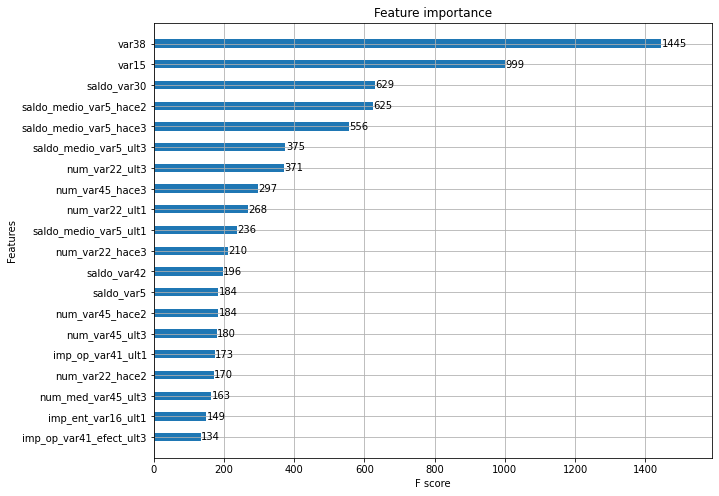

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=evals,verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [19]:
params = {'num_leaves': [32, 64 ],'max_depth':[128, 160],'min_child_samples':[60, 100],'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0.139668	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149317
[7]	valid_0's auc: 0.846352	valid_0's binary_logloss: 0.137997	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.14773
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13653	valid_1's auc: 0.837152	valid

[25]	valid_0's auc: 0.871049	valid_0's binary_logloss: 0.125668	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.13995
[26]	valid_0's auc: 0.872235	valid_0's binary_logloss: 0.125315	valid_1's auc: 0.838843	valid_1's binary_logloss: 0.139851
[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 0.878434	valid_0's binary_logloss: 0.12342	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139551
[33]	valid_0's auc: 0

[26]	valid_0's auc: 0.873104	valid_0's binary_logloss: 0.124779	valid_1's auc: 0.839199	valid_1's binary_logloss: 0.139332
[27]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139331
[28]	valid_0's auc: 0.874885	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.139318
[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc:

[9]	valid_0's auc: 0.852263	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.837774	valid_1's binary_logloss: 0.145698
[10]	valid_0's auc: 0.85341	valid_0's binary_logloss: 0.133984	valid_1's auc: 0.838489	valid_1's binary_logloss: 0.144779
[11]	valid_0's auc: 0.854546	valid_0's binary_logloss: 0.133037	valid_1's auc: 0.838329	valid_1's binary_logloss: 0.144036
[12]	valid_0's auc: 0.857306	valid_0's binary_logloss: 0.132091	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143435
[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0

[26]	valid_0's auc: 0.873637	valid_0's binary_logloss: 0.124863	valid_1's auc: 0.837507	valid_1's binary_logloss: 0.139972
[27]	valid_0's auc: 0.874915	valid_0's binary_logloss: 0.124512	valid_1's auc: 0.837071	valid_1's binary_logloss: 0.13997
[28]	valid_0's auc: 0.875606	valid_0's binary_logloss: 0.124208	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.8

[56]	valid_0's auc: 0.894199	valid_0's binary_logloss: 0.11793	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139637
[57]	valid_0's auc: 0.89466	valid_0's binary_logloss: 0.117712	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.139591
[58]	valid_0's auc: 0.895326	valid_0's binary_logloss: 0.117469	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.13955
[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.117049	valid_1's auc: 0.839353	valid_1's binary_logloss: 0.13952
[61]	valid_0's auc: 0.896615	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.139489
[62]	valid_0's auc: 0.896835	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.83954	valid_1's binary_logloss: 0.139477
[63]	valid_0's auc: 0.897122	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.839488	valid_1's binary_logloss: 0.139542
[64]	valid_0's auc: 0

[17]	valid_0's auc: 0.863173	valid_0's binary_logloss: 0.12899	valid_1's auc: 0.839661	valid_1's binary_logloss: 0.14098
[18]	valid_0's auc: 0.86416	valid_0's binary_logloss: 0.128464	valid_1's auc: 0.840222	valid_1's binary_logloss: 0.140694
[19]	valid_0's auc: 0.865283	valid_0's binary_logloss: 0.127961	valid_1's auc: 0.840849	valid_1's binary_logloss: 0.140423
[20]	valid_0's auc: 0.866225	valid_0's binary_logloss: 0.127509	valid_1's auc: 0.840833	valid_1's binary_logloss: 0.14018
[21]	valid_0's auc: 0.867694	valid_0's binary_logloss: 0.127023	valid_1's auc: 0.840208	valid_1's binary_logloss: 0.140086
[22]	valid_0's auc: 0.868631	valid_0's binary_logloss: 0.126644	valid_1's auc: 0.840015	valid_1's binary_logloss: 0.140012
[23]	valid_0's auc: 0.869457	valid_0's binary_logloss: 0.126294	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.139913
[24]	valid_0's auc: 0.870406	valid_0's binary_logloss: 0.125894	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139821
[25]	valid_0's auc: 

[43]	valid_0's auc: 0.888297	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.139746
[44]	valid_0's auc: 0.888751	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.838275	valid_1's binary_logloss: 0.139792
[45]	valid_0's auc: 0.889218	valid_0's binary_logloss: 0.11959	valid_1's auc: 0.838093	valid_1's binary_logloss: 0.139831
[46]	valid_0's auc: 0.889658	valid_0's binary_logloss: 0.119417	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.139882
[47]	valid_0's auc: 0.890378	valid_0's binary_logloss: 0.119151	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139877
[48]	valid_0's auc: 0.890895	valid_0's binary_logloss: 0.118954	valid_1's auc: 0.837653	valid_1's binary_logloss: 0.139901
[49]	valid_0's auc: 0.891347	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837491	valid_1's binary_logloss: 0.139944
[50]	valid_0's auc: 0.891951	valid_0's binary_logloss: 0.118533	valid_1's auc: 0.837711	valid_1's binary_logloss: 0.139907
[51]	valid_0's au

[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's au

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0.137304	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.148859
[7]	valid_0's auc: 0.861253	valid_0's binary_logloss: 0.135409	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.147425
[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	val

[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0.901489	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.139838
[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 

[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's au

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0.137304	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.148859
[7]	valid_0's auc: 0.861253	valid_0's binary_logloss: 0.135409	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.147425
[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	val

[28]	valid_0's auc: 0.897577	valid_0's binary_logloss: 0.117012	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.13976
[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0.901489	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.139838
[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0

[19]	valid_0's auc: 0.864889	valid_0's binary_logloss: 0.128277	valid_1's auc: 0.838259	valid_1's binary_logloss: 0.140809
[20]	valid_0's auc: 0.866078	valid_0's binary_logloss: 0.127784	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.140562
[21]	valid_0's auc: 0.867603	valid_0's binary_logloss: 0.127332	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.140388
[22]	valid_0's auc: 0.868543	valid_0's binary_logloss: 0.126965	valid_1's auc: 0.839411	valid_1's binary_logloss: 0.140109
[23]	valid_0's auc: 0.869425	valid_0's binary_logloss: 0.126584	valid_1's auc: 0.839209	valid_1's binary_logloss: 0.140008
[24]	valid_0's auc: 0.870709	valid_0's binary_logloss: 0.126196	valid_1's auc: 0.839023	valid_1's binary_logloss: 0.139927
[25]	valid_0's auc: 0.871705	valid_0's binary_logloss: 0.125859	valid_1's auc: 0.839425	valid_1's binary_logloss: 0.139761
[26]	valid_0's auc: 0.872446	valid_0's binary_logloss: 0.125544	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139669
[27]	valid_0's a

[9]	valid_0's auc: 0.853959	valid_0's binary_logloss: 0.135455	valid_1's auc: 0.838004	valid_1's binary_logloss: 0.14532
[10]	valid_0's auc: 0.855068	valid_0's binary_logloss: 0.134344	valid_1's auc: 0.837945	valid_1's binary_logloss: 0.14436
[11]	valid_0's auc: 0.85623	valid_0's binary_logloss: 0.133408	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.143531
[12]	valid_0's auc: 0.858039	valid_0's binary_logloss: 0.132542	valid_1's auc: 0.837412	valid_1's binary_logloss: 0.14298
[13]	valid_0's auc: 0.859028	valid_0's binary_logloss: 0.131715	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.142378
[14]	valid_0's auc: 0.859761	valid_0's binary_logloss: 0.131029	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.141936
[15]	valid_0's auc: 0.860544	valid_0's binary_logloss: 0.130418	valid_1's auc: 0.837904	valid_1's binary_logloss: 0.141546
[16]	valid_0's auc: 0.861421	valid_0's binary_logloss: 0.129852	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.141202
[17]	valid_0's auc: 0

[24]	valid_0's auc: 0.868969	valid_0's binary_logloss: 0.126539	valid_1's auc: 0.840613	valid_1's binary_logloss: 0.139718
[25]	valid_0's auc: 0.869633	valid_0's binary_logloss: 0.126207	valid_1's auc: 0.840891	valid_1's binary_logloss: 0.139605
[26]	valid_0's auc: 0.870328	valid_0's binary_logloss: 0.125875	valid_1's auc: 0.840762	valid_1's binary_logloss: 0.139544
[27]	valid_0's auc: 0.871064	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.139537
[28]	valid_0's auc: 0.871903	valid_0's binary_logloss: 0.125269	valid_1's auc: 0.840808	valid_1's binary_logloss: 0.139402
[29]	valid_0's auc: 0.872504	valid_0's binary_logloss: 0.125	valid_1's auc: 0.841418	valid_1's binary_logloss: 0.139244
[30]	valid_0's auc: 0.873414	valid_0's binary_logloss: 0.124748	valid_1's auc: 0.841413	valid_1's binary_logloss: 0.139195
[31]	valid_0's auc: 0.874222	valid_0's binary_logloss: 0.124528	valid_1's auc: 0.841154	valid_1's binary_logloss: 0.139136
[32]	valid_0's auc:

[26]	valid_0's auc: 0.87384	valid_0's binary_logloss: 0.125262	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139982
[27]	valid_0's auc: 0.874627	valid_0's binary_logloss: 0.124925	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.139915
[28]	valid_0's auc: 0.875699	valid_0's binary_logloss: 0.124584	valid_1's auc: 0.839547	valid_1's binary_logloss: 0.139817
[29]	valid_0's auc: 0.876221	valid_0's binary_logloss: 0.124306	valid_1's auc: 0.839141	valid_1's binary_logloss: 0.139849
[30]	valid_0's auc: 0.877132	valid_0's binary_logloss: 0.124013	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139822
[31]	valid_0's auc: 0.877844	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.838646	valid_1's binary_logloss: 0.13985
[32]	valid_0's auc: 0.87892	valid_0's binary_logloss: 0.123439	valid_1's auc: 0.838613	valid_1's binary_logloss: 0.139821
[33]	valid_0's auc: 0.879652	valid_0's binary_logloss: 0.123181	valid_1's auc: 0.838807	valid_1's binary_logloss: 0.139738
[34]	valid_0's auc:

[10]	valid_0's auc: 0.854493	valid_0's binary_logloss: 0.134424	valid_1's auc: 0.840118	valid_1's binary_logloss: 0.144559
[11]	valid_0's auc: 0.855706	valid_0's binary_logloss: 0.133419	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.143738
[12]	valid_0's auc: 0.856699	valid_0's binary_logloss: 0.132606	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.143123
[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 0.862291	valid_0's binary_logloss: 0.129367	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.14141
[18]	valid_0's auc: 

[82]	valid_0's auc: 0.901374	valid_0's binary_logloss: 0.114684	valid_1's auc: 0.838307	valid_1's binary_logloss: 0.139756
Early stopping, best iteration is:
[52]	valid_0's auc: 0.890152	valid_0's binary_logloss: 0.119433	valid_1's auc: 0.840573	valid_1's binary_logloss: 0.139057
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_logloss: 0.151068	valid_1's auc: 0.82089	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.837129	valid_0's binary_logloss: 0.147251	valid_1's auc: 0.824177	valid_1's binary_logloss: 0.156394
[4]	valid_0's auc: 0.843357	valid_0's binary_logloss: 0.144256	valid_1's auc: 0.83301	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.845853	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.834409	valid_1's binary_logloss: 0.15109
[6]	valid_0's auc: 0.848055	valid_0's binary_logloss

[10]	valid_0's auc: 0.852731	valid_0's binary_logloss: 0.1346	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.144574
[11]	valid_0's auc: 0.854347	valid_0's binary_logloss: 0.133651	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.143809
[12]	valid_0's auc: 0.856033	valid_0's binary_logloss: 0.132781	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.143175
[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859463	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141766
[16]	valid_0's auc: 0.861133	valid_0's binary_logloss: 0.130082	valid_1's auc: 0.839698	valid_1's binary_logloss: 0.141417
[17]	valid_0's auc: 0.862389	valid_0's binary_logloss: 0.129514	valid_1's auc: 0.840248	valid_1's binary_logloss: 0.141118
[18]	valid_0's auc:

[9]	valid_0's auc: 0.851781	valid_0's binary_logloss: 0.135425	valid_1's auc: 0.83865	valid_1's binary_logloss: 0.14556
[10]	valid_0's auc: 0.853427	valid_0's binary_logloss: 0.134315	valid_1's auc: 0.839438	valid_1's binary_logloss: 0.144706
[11]	valid_0's auc: 0.855724	valid_0's binary_logloss: 0.133332	valid_1's auc: 0.840325	valid_1's binary_logloss: 0.143886
[12]	valid_0's auc: 0.858216	valid_0's binary_logloss: 0.132432	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.143313
[13]	valid_0's auc: 0.859679	valid_0's binary_logloss: 0.131601	valid_1's auc: 0.839935	valid_1's binary_logloss: 0.142769
[14]	valid_0's auc: 0.861141	valid_0's binary_logloss: 0.130863	valid_1's auc: 0.839692	valid_1's binary_logloss: 0.142351
[15]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.130183	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.141979
[16]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.129599	valid_1's auc: 0.839301	valid_1's binary_logloss: 0.141721
[17]	valid_0's auc:

[39]	valid_0's auc: 0.903193	valid_0's binary_logloss: 0.114967	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.140542
[40]	valid_0's auc: 0.903837	valid_0's binary_logloss: 0.114593	valid_1's auc: 0.832851	valid_1's binary_logloss: 0.140547
Early stopping, best iteration is:
[10]	valid_0's auc: 0.86769	valid_0's binary_logloss: 0.131709	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.144369
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848463	valid_0's binary_logloss: 0.146017	valid_1's auc: 0.829633	valid_1's binary_logloss: 0.156156
[4]	valid_0's auc: 0.852213	valid_0's binary_logloss: 0.142854	valid_1's auc: 0.831653	valid_1's binary_logloss: 0.153329
[5]	valid_0's auc: 0.856788	valid_0's binary_logl

[28]	valid_0's auc: 0.892934	valid_0's binary_logloss: 0.119048	valid_1's auc: 0.838032	valid_1's binary_logloss: 0.139456
[29]	valid_0's auc: 0.893916	valid_0's binary_logloss: 0.11863	valid_1's auc: 0.838337	valid_1's binary_logloss: 0.139417
[30]	valid_0's auc: 0.89493	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.838325	valid_1's binary_logloss: 0.139369
[31]	valid_0's auc: 0.895676	valid_0's binary_logloss: 0.11783	valid_1's auc: 0.838392	valid_1's binary_logloss: 0.139363
[32]	valid_0's auc: 0.896629	valid_0's binary_logloss: 0.11742	valid_1's auc: 0.838672	valid_1's binary_logloss: 0.139258
[33]	valid_0's auc: 0.897375	valid_0's binary_logloss: 0.117081	valid_1's auc: 0.838017	valid_1's binary_logloss: 0.139339
[34]	valid_0's auc: 0.898536	valid_0's binary_logloss: 0.11671	valid_1's auc: 0.838448	valid_1's binary_logloss: 0.139301
[35]	valid_0's auc: 0.899294	valid_0's binary_logloss: 0.116358	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.139398
[36]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845771	valid_0's binary_logloss: 0.150186	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.159526
[3]	valid_0's auc: 0.848443	valid_0's binary_logloss: 0.145978	valid_1's auc: 0.833062	valid_1's binary_logloss: 0.15588
[4]	valid_0's auc: 0.851538	valid_0's binary_logloss: 0.142729	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.153021
[5]	valid_0's auc: 0.853675	valid_0's binary_logloss: 0.140151	valid_1's auc: 0.833937	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.858806	valid_0's binary_logloss: 0.137922	valid_1's auc: 0.836624	valid_1's binary_logloss: 0.148776
[7]	valid_0's auc: 0.861104	valid_0's binary_logloss: 0.136051	valid_1's auc: 0.838108	valid_1's binary_logloss: 0.147208
[8]	valid_0's auc: 0.86355	valid_0's binary_logloss: 0.134417	valid_1's auc: 0.838247	

[15]	valid_0's auc: 0.876476	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.836305	valid_1's binary_logloss: 0.141856
[16]	valid_0's auc: 0.878541	valid_0's binary_logloss: 0.125992	valid_1's auc: 0.835636	valid_1's binary_logloss: 0.141705
[17]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.125312	valid_1's auc: 0.836068	valid_1's binary_logloss: 0.141422
[18]	valid_0's auc: 0.881206	valid_0's binary_logloss: 0.124607	valid_1's auc: 0.835907	valid_1's binary_logloss: 0.141232
[19]	valid_0's auc: 0.882227	valid_0's binary_logloss: 0.123945	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.140955
[20]	valid_0's auc: 0.883084	valid_0's binary_logloss: 0.123391	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.140874
[21]	valid_0's auc: 0.884492	valid_0's binary_logloss: 0.122771	valid_1's auc: 0.835176	valid_1's binary_logloss: 0.140717
[22]	valid_0's auc: 0.885916	valid_0's binary_logloss: 0.122201	valid_1's auc: 0.834761	valid_1's binary_logloss: 0.140682
[23]	valid_0's a

[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846144	valid_0's binary_logloss: 0.150047	valid_1's auc: 0.829297	valid_1's binary_logloss: 0.159501
[3]	valid_0's auc: 0.850748	valid_0's binary_logloss: 0.145939	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.155723
[4]	valid_0's auc: 0.854724	valid_0's binary_logloss: 0.142635	valid_1's auc: 0.835829	valid_1's binary_logloss: 0.152741
[5]	valid_0's auc: 0.857933	valid_0's binary_logloss: 0.139975	valid_1's auc: 0.836781	valid_1's binary_logloss: 0.150453
[6]	valid_0's auc: 0.860689	valid_0's binary_logloss: 0.137721	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.148529
[7]	valid_0's auc: 0.862487	valid_0's binary_logloss: 0.135899	valid_1's auc: 0.837553	valid_1's binary_logloss: 0.147049
[8]	valid_0's auc: 0.864201	valid_0's binary_logloss: 0.134257	valid_1's auc: 0.83850

[27]	valid_0's auc: 0.890029	valid_0's binary_logloss: 0.120084	valid_1's auc: 0.839403	valid_1's binary_logloss: 0.1394
[28]	valid_0's auc: 0.890855	valid_0's binary_logloss: 0.119625	valid_1's auc: 0.839197	valid_1's binary_logloss: 0.139395
[29]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.11927	valid_1's auc: 0.839139	valid_1's binary_logloss: 0.139388
[30]	valid_0's auc: 0.893076	valid_0's binary_logloss: 0.118772	valid_1's auc: 0.839184	valid_1's binary_logloss: 0.139362
[31]	valid_0's auc: 0.893948	valid_0's binary_logloss: 0.118371	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.139379
[32]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.118017	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139254
[33]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.839317	valid_1's binary_logloss: 0.139315
[34]	valid_0's auc: 0.896649	valid_0's binary_logloss: 0.117197	valid_1's auc: 0.839013	valid_1's binary_logloss: 0.139333
[35]	valid_0's auc:

[47]	valid_0's auc: 0.908566	valid_0's binary_logloss: 0.111952	valid_1's auc: 0.837431	valid_1's binary_logloss: 0.139893
[48]	valid_0's auc: 0.909236	valid_0's binary_logloss: 0.111656	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139856
[49]	valid_0's auc: 0.909884	valid_0's binary_logloss: 0.111332	valid_1's auc: 0.837497	valid_1's binary_logloss: 0.139881
[50]	valid_0's auc: 0.91027	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.837446	valid_1's binary_logloss: 0.139932
[51]	valid_0's auc: 0.910654	valid_0's binary_logloss: 0.110807	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.13997
Early stopping, best iteration is:
[21]	valid_0's auc: 0.885332	valid_0's binary_logloss: 0.122652	valid_1's auc: 0.83937	valid_1's binary_logloss: 0.140159
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logl

[25]	valid_0's auc: 0.871049	valid_0's binary_logloss: 0.125668	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.13995
[26]	valid_0's auc: 0.872235	valid_0's binary_logloss: 0.125315	valid_1's auc: 0.838843	valid_1's binary_logloss: 0.139851
[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 0.878434	valid_0's binary_logloss: 0.12342	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139551
[33]	valid_0's auc: 0

[26]	valid_0's auc: 0.873104	valid_0's binary_logloss: 0.124779	valid_1's auc: 0.839199	valid_1's binary_logloss: 0.139332
[27]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139331
[28]	valid_0's auc: 0.874885	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.139318
[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc:

[10]	valid_0's auc: 0.85341	valid_0's binary_logloss: 0.133984	valid_1's auc: 0.838489	valid_1's binary_logloss: 0.144779
[11]	valid_0's auc: 0.854546	valid_0's binary_logloss: 0.133037	valid_1's auc: 0.838329	valid_1's binary_logloss: 0.144036
[12]	valid_0's auc: 0.857306	valid_0's binary_logloss: 0.132091	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143435
[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0.865398	valid_0's binary_logloss: 0.128509	valid_1's auc: 0.837949	valid_1's binary_logloss: 0.141482
[18]	valid_0's auc: 

[26]	valid_0's auc: 0.873637	valid_0's binary_logloss: 0.124863	valid_1's auc: 0.837507	valid_1's binary_logloss: 0.139972
[27]	valid_0's auc: 0.874915	valid_0's binary_logloss: 0.124512	valid_1's auc: 0.837071	valid_1's binary_logloss: 0.13997
[28]	valid_0's auc: 0.875606	valid_0's binary_logloss: 0.124208	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.8

[57]	valid_0's auc: 0.89466	valid_0's binary_logloss: 0.117712	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.139591
[58]	valid_0's auc: 0.895326	valid_0's binary_logloss: 0.117469	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.13955
[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.117049	valid_1's auc: 0.839353	valid_1's binary_logloss: 0.13952
[61]	valid_0's auc: 0.896615	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.139489
[62]	valid_0's auc: 0.896835	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.83954	valid_1's binary_logloss: 0.139477
[63]	valid_0's auc: 0.897122	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.839488	valid_1's binary_logloss: 0.139542
[64]	valid_0's auc: 0.897561	valid_0's binary_logloss: 0.116399	valid_1's auc: 0.839571	valid_1's binary_logloss: 0.139557
[65]	valid_0's auc: 

[17]	valid_0's auc: 0.863173	valid_0's binary_logloss: 0.12899	valid_1's auc: 0.839661	valid_1's binary_logloss: 0.14098
[18]	valid_0's auc: 0.86416	valid_0's binary_logloss: 0.128464	valid_1's auc: 0.840222	valid_1's binary_logloss: 0.140694
[19]	valid_0's auc: 0.865283	valid_0's binary_logloss: 0.127961	valid_1's auc: 0.840849	valid_1's binary_logloss: 0.140423
[20]	valid_0's auc: 0.866225	valid_0's binary_logloss: 0.127509	valid_1's auc: 0.840833	valid_1's binary_logloss: 0.14018
[21]	valid_0's auc: 0.867694	valid_0's binary_logloss: 0.127023	valid_1's auc: 0.840208	valid_1's binary_logloss: 0.140086
[22]	valid_0's auc: 0.868631	valid_0's binary_logloss: 0.126644	valid_1's auc: 0.840015	valid_1's binary_logloss: 0.140012
[23]	valid_0's auc: 0.869457	valid_0's binary_logloss: 0.126294	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.139913
[24]	valid_0's auc: 0.870406	valid_0's binary_logloss: 0.125894	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139821
[25]	valid_0's auc: 

[42]	valid_0's auc: 0.887719	valid_0's binary_logloss: 0.120203	valid_1's auc: 0.838618	valid_1's binary_logloss: 0.139774
[43]	valid_0's auc: 0.888297	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.139746
[44]	valid_0's auc: 0.888751	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.838275	valid_1's binary_logloss: 0.139792
[45]	valid_0's auc: 0.889218	valid_0's binary_logloss: 0.11959	valid_1's auc: 0.838093	valid_1's binary_logloss: 0.139831
[46]	valid_0's auc: 0.889658	valid_0's binary_logloss: 0.119417	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.139882
[47]	valid_0's auc: 0.890378	valid_0's binary_logloss: 0.119151	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139877
[48]	valid_0's auc: 0.890895	valid_0's binary_logloss: 0.118954	valid_1's auc: 0.837653	valid_1's binary_logloss: 0.139901
[49]	valid_0's auc: 0.891347	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837491	valid_1's binary_logloss: 0.139944
[50]	valid_0's au

[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0.137304	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.148859
[7]	valid_0's auc: 0.861253	valid_0's binary_logloss: 0.135409	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.147425
[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	val

[28]	valid_0's auc: 0.897577	valid_0's binary_logloss: 0.117012	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.13976
[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0.901489	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.139838
[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0

[11]	valid_0's auc: 0.870497	valid_0's binary_logloss: 0.129588	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.143849
[12]	valid_0's auc: 0.872518	valid_0's binary_logloss: 0.128457	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.143269
[13]	valid_0's auc: 0.874694	valid_0's binary_logloss: 0.127432	valid_1's auc: 0.836313	valid_1's binary_logloss: 0.142877
[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc

[40]	valid_0's auc: 0.90799	valid_0's binary_logloss: 0.112292	valid_1's auc: 0.836599	valid_1's binary_logloss: 0.139889
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870091	valid_0's binary_logloss: 0.13052	valid_1's auc: 0.837854	valid_1's binary_logloss: 0.144004
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0

[23]	valid_0's auc: 0.891319	valid_0's binary_logloss: 0.119611	valid_1's auc: 0.838977	valid_1's binary_logloss: 0.139757
[24]	valid_0's auc: 0.892514	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.838972	valid_1's binary_logloss: 0.139751
[25]	valid_0's auc: 0.893713	valid_0's binary_logloss: 0.118504	valid_1's auc: 0.838961	valid_1's binary_logloss: 0.139724
[26]	valid_0's auc: 0.894841	valid_0's binary_logloss: 0.11799	valid_1's auc: 0.837989	valid_1's binary_logloss: 0.13985
[27]	valid_0's auc: 0.896483	valid_0's binary_logloss: 0.117466	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.139851
[28]	valid_0's auc: 0.897577	valid_0's binary_logloss: 0.117012	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.13976
[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 

[10]	valid_0's auc: 0.854493	valid_0's binary_logloss: 0.134424	valid_1's auc: 0.840118	valid_1's binary_logloss: 0.144559
[11]	valid_0's auc: 0.855706	valid_0's binary_logloss: 0.133419	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.143738
[12]	valid_0's auc: 0.856699	valid_0's binary_logloss: 0.132606	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.143123
[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 0.862291	valid_0's binary_logloss: 0.129367	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.14141
[18]	valid_0's auc: 

[82]	valid_0's auc: 0.901374	valid_0's binary_logloss: 0.114684	valid_1's auc: 0.838307	valid_1's binary_logloss: 0.139756
Early stopping, best iteration is:
[52]	valid_0's auc: 0.890152	valid_0's binary_logloss: 0.119433	valid_1's auc: 0.840573	valid_1's binary_logloss: 0.139057
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_logloss: 0.151068	valid_1's auc: 0.82089	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.837129	valid_0's binary_logloss: 0.147251	valid_1's auc: 0.824177	valid_1's binary_logloss: 0.156394
[4]	valid_0's auc: 0.843357	valid_0's binary_logloss: 0.144256	valid_1's auc: 0.83301	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.845853	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.834409	valid_1's binary_logloss: 0.15109
[6]	valid_0's auc: 0.848055	valid_0's binary_logloss

[10]	valid_0's auc: 0.852731	valid_0's binary_logloss: 0.1346	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.144574
[11]	valid_0's auc: 0.854347	valid_0's binary_logloss: 0.133651	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.143809
[12]	valid_0's auc: 0.856033	valid_0's binary_logloss: 0.132781	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.143175
[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859463	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141766
[16]	valid_0's auc: 0.861133	valid_0's binary_logloss: 0.130082	valid_1's auc: 0.839698	valid_1's binary_logloss: 0.141417
[17]	valid_0's auc: 0.862389	valid_0's binary_logloss: 0.129514	valid_1's auc: 0.840248	valid_1's binary_logloss: 0.141118
[18]	valid_0's auc:

[15]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.130183	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.141979
[16]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.129599	valid_1's auc: 0.839301	valid_1's binary_logloss: 0.141721
[17]	valid_0's auc: 0.865172	valid_0's binary_logloss: 0.129048	valid_1's auc: 0.839254	valid_1's binary_logloss: 0.141394
[18]	valid_0's auc: 0.866347	valid_0's binary_logloss: 0.128499	valid_1's auc: 0.838727	valid_1's binary_logloss: 0.141154
[19]	valid_0's auc: 0.867494	valid_0's binary_logloss: 0.127978	valid_1's auc: 0.838823	valid_1's binary_logloss: 0.14085
[20]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.127501	valid_1's auc: 0.839034	valid_1's binary_logloss: 0.140713
[21]	valid_0's auc: 0.869399	valid_0's binary_logloss: 0.127084	valid_1's auc: 0.839077	valid_1's binary_logloss: 0.140501
[22]	valid_0's auc: 0.870345	valid_0's binary_logloss: 0.12668	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.140273
[23]	valid_0's auc

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.838891	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.827874	valid_1's binary_logloss: 0.15652
[4]	valid_0's auc: 0.842728	valid_0's binary_logloss: 0.14425	valid_1's auc: 0.83071	valid_1's binary_logloss: 0.153668
[5]	valid_0's auc: 0.845584	valid_0's binary_logloss: 0.141826	valid_1's auc: 0.834779	valid_1's binary_logloss: 0.151293
[6]	valid_0's auc: 0.847718	valid_0's binary_logloss: 0.139818	valid_1's auc: 0.837009	valid_1's binary_logloss: 0.149383
[7]	valid_0's auc: 0.849442	valid_0's binary_logloss: 0.138163	valid_1's auc: 0.838677	valid_1's binary_logloss: 0.147893
[8]	valid_0's auc: 0.851282	valid_0's binary_logloss: 0.136716	valid_1's auc: 0.839194	val

[70]	valid_0's auc: 0.896964	valid_0's binary_logloss: 0.11652	valid_1's auc: 0.839141	valid_1's binary_logloss: 0.139479
[71]	valid_0's auc: 0.897493	valid_0's binary_logloss: 0.116317	valid_1's auc: 0.839229	valid_1's binary_logloss: 0.139467
[72]	valid_0's auc: 0.897883	valid_0's binary_logloss: 0.11619	valid_1's auc: 0.839233	valid_1's binary_logloss: 0.139492
[73]	valid_0's auc: 0.898081	valid_0's binary_logloss: 0.11609	valid_1's auc: 0.839315	valid_1's binary_logloss: 0.139474
[74]	valid_0's auc: 0.898317	valid_0's binary_logloss: 0.115945	valid_1's auc: 0.839169	valid_1's binary_logloss: 0.139537
[75]	valid_0's auc: 0.898738	valid_0's binary_logloss: 0.115738	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.139572
[76]	valid_0's auc: 0.899277	valid_0's binary_logloss: 0.11555	valid_1's auc: 0.838538	valid_1's binary_logloss: 0.139666
[77]	valid_0's auc: 0.899505	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.83811	valid_1's binary_logloss: 0.139767
[78]	valid_0's auc: 0

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828944	valid_0's binary_logloss: 0.151015	valid_1's auc: 0.824175	valid_1's binary_logloss: 0.159943
[3]	valid_0's auc: 0.836434	valid_0's binary_logloss: 0.147258	valid_1's auc: 0.828101	valid_1's binary_logloss: 0.156259
[4]	valid_0's auc: 0.842016	valid_0's binary_logloss: 0.144302	valid_1's auc: 0.833931	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.844482	valid_0's binary_logloss: 0.141997	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.151119
[6]	valid_0's auc: 0.846285	valid_0's binary_logloss: 0.140033	valid_1's auc: 0.837061	valid_1's binary_logloss: 0.149231
[7]	valid_0's auc: 0.847922	valid_0's binary_logloss: 0.13832	valid_1's auc: 0.836619	valid_1's binary_logloss: 0.14775
[8]	valid_0's auc: 0.849559	valid_0's binary_logloss: 0.136854	valid_1's auc: 0.838716	

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829937	valid_0's binary_logloss: 0.151224	valid_1's auc: 0.824105	valid_1's binary_logloss: 0.159979
[3]	valid_0's auc: 0.835994	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829897	valid_1's binary_logloss: 0.156364
[4]	valid_0's auc: 0.842039	valid_0's binary_logloss: 0.144347	valid_1's auc: 0.833604	valid_1's binary_logloss: 0.153341
[5]	valid_0's auc: 0.844582	valid_0's binary_logloss: 0.141977	valid_1's auc: 0.834914	valid_1's binary_logloss: 0.151142
[6]	valid_0's auc: 0.846674	valid_0's binary_logloss: 0.139904	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.149283
[7]	valid_0's auc: 0.848753	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.836967	valid_1's binary_logloss: 0.147879
[8]	valid_0's auc: 0.85037	valid_0's binary_logloss: 0.136696	valid_1's auc: 0.838167	

[28]	valid_0's auc: 0.892648	valid_0's binary_logloss: 0.119308	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.140536
[29]	valid_0's auc: 0.893728	valid_0's binary_logloss: 0.11884	valid_1's auc: 0.832714	valid_1's binary_logloss: 0.140528
[30]	valid_0's auc: 0.89496	valid_0's binary_logloss: 0.118388	valid_1's auc: 0.832875	valid_1's binary_logloss: 0.140472
[31]	valid_0's auc: 0.8959	valid_0's binary_logloss: 0.117982	valid_1's auc: 0.832306	valid_1's binary_logloss: 0.140553
[32]	valid_0's auc: 0.897024	valid_0's binary_logloss: 0.117572	valid_1's auc: 0.832331	valid_1's binary_logloss: 0.140532
[33]	valid_0's auc: 0.897728	valid_0's binary_logloss: 0.117207	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.140482
[34]	valid_0's auc: 0.89876	valid_0's binary_logloss: 0.116868	valid_1's auc: 0.832733	valid_1's binary_logloss: 0.140439
[35]	valid_0's auc: 0.899576	valid_0's binary_logloss: 0.116494	valid_1's auc: 0.833124	valid_1's binary_logloss: 0.140355
[36]	valid_0's auc: 0

[15]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.838285	valid_1's binary_logloss: 0.141151
[16]	valid_0's auc: 0.877596	valid_0's binary_logloss: 0.125803	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.140868
[17]	valid_0's auc: 0.879382	valid_0's binary_logloss: 0.125043	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.140538
[18]	valid_0's auc: 0.880373	valid_0's binary_logloss: 0.124368	valid_1's auc: 0.838596	valid_1's binary_logloss: 0.140383
[19]	valid_0's auc: 0.882263	valid_0's binary_logloss: 0.123754	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.140222
[20]	valid_0's auc: 0.883375	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838085	valid_1's binary_logloss: 0.140075
[21]	valid_0's auc: 0.884525	valid_0's binary_logloss: 0.122599	valid_1's auc: 0.838622	valid_1's binary_logloss: 0.139898
[22]	valid_0's auc: 0.886221	valid_0's binary_logloss: 0.121989	valid_1's auc: 0.838133	valid_1's binary_logloss: 0.13986
[23]	valid_0's au

[38]	valid_0's auc: 0.900611	valid_0's binary_logloss: 0.115643	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.139279
[39]	valid_0's auc: 0.901386	valid_0's binary_logloss: 0.115309	valid_1's auc: 0.838695	valid_1's binary_logloss: 0.139419
[40]	valid_0's auc: 0.902187	valid_0's binary_logloss: 0.114964	valid_1's auc: 0.838583	valid_1's binary_logloss: 0.139426
[41]	valid_0's auc: 0.902835	valid_0's binary_logloss: 0.114647	valid_1's auc: 0.838589	valid_1's binary_logloss: 0.139468
[42]	valid_0's auc: 0.903582	valid_0's binary_logloss: 0.114281	valid_1's auc: 0.838589	valid_1's binary_logloss: 0.139466
[43]	valid_0's auc: 0.904313	valid_0's binary_logloss: 0.113958	valid_1's auc: 0.838242	valid_1's binary_logloss: 0.139499
[44]	valid_0's auc: 0.904841	valid_0's binary_logloss: 0.113635	valid_1's auc: 0.838466	valid_1's binary_logloss: 0.13949
[45]	valid_0's auc: 0.905581	valid_0's binary_logloss: 0.113268	valid_1's auc: 0.838414	valid_1's binary_logloss: 0.139532
[46]	valid_0's au

[8]	valid_0's auc: 0.864698	valid_0's binary_logloss: 0.134405	valid_1's auc: 0.836809	valid_1's binary_logloss: 0.146216
[9]	valid_0's auc: 0.866446	valid_0's binary_logloss: 0.132978	valid_1's auc: 0.836892	valid_1's binary_logloss: 0.14524
[10]	valid_0's auc: 0.86769	valid_0's binary_logloss: 0.131709	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.144369
[11]	valid_0's auc: 0.870043	valid_0's binary_logloss: 0.130502	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.143667
[12]	valid_0's auc: 0.872157	valid_0's binary_logloss: 0.12943	valid_1's auc: 0.837131	valid_1's binary_logloss: 0.143071
[13]	valid_0's auc: 0.873846	valid_0's binary_logloss: 0.128485	valid_1's auc: 0.837222	valid_1's binary_logloss: 0.142533
[14]	valid_0's auc: 0.874865	valid_0's binary_logloss: 0.127602	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.142206
[15]	valid_0's auc: 0.876476	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.836305	valid_1's binary_logloss: 0.141856
[16]	valid_0's auc: 0

[36]	valid_0's auc: 0.902277	valid_0's binary_logloss: 0.115729	valid_1's auc: 0.834892	valid_1's binary_logloss: 0.140333
[37]	valid_0's auc: 0.903004	valid_0's binary_logloss: 0.115377	valid_1's auc: 0.834556	valid_1's binary_logloss: 0.140406
[38]	valid_0's auc: 0.903769	valid_0's binary_logloss: 0.115063	valid_1's auc: 0.834414	valid_1's binary_logloss: 0.140457
Early stopping, best iteration is:
[8]	valid_0's auc: 0.864314	valid_0's binary_logloss: 0.134386	valid_1's auc: 0.836999	valid_1's binary_logloss: 0.146564
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846144	valid_0's binary_logloss: 0.150047	valid_1's auc: 0.829297	valid_1's binary_logloss: 0.159501
[3]	valid_0's auc: 0.850748	valid_0's binary_logloss: 0.145939	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.155723
[4]	valid_0's auc: 0.854724	valid_0's binary_lo

[21]	valid_0's auc: 0.882729	valid_0's binary_logloss: 0.123219	valid_1's auc: 0.839572	valid_1's binary_logloss: 0.139907
[22]	valid_0's auc: 0.883997	valid_0's binary_logloss: 0.122629	valid_1's auc: 0.83966	valid_1's binary_logloss: 0.139728
[23]	valid_0's auc: 0.885309	valid_0's binary_logloss: 0.122079	valid_1's auc: 0.839604	valid_1's binary_logloss: 0.139585
[24]	valid_0's auc: 0.886572	valid_0's binary_logloss: 0.121546	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.139487
[25]	valid_0's auc: 0.887807	valid_0's binary_logloss: 0.121033	valid_1's auc: 0.839794	valid_1's binary_logloss: 0.139427
[26]	valid_0's auc: 0.88901	valid_0's binary_logloss: 0.120543	valid_1's auc: 0.839667	valid_1's binary_logloss: 0.139398
[27]	valid_0's auc: 0.890029	valid_0's binary_logloss: 0.120084	valid_1's auc: 0.839403	valid_1's binary_logloss: 0.1394
[28]	valid_0's auc: 0.890855	valid_0's binary_logloss: 0.119625	valid_1's auc: 0.839197	valid_1's binary_logloss: 0.139395
[29]	valid_0's auc: 0.

[43]	valid_0's auc: 0.906168	valid_0's binary_logloss: 0.113219	valid_1's auc: 0.836636	valid_1's binary_logloss: 0.140003
[44]	valid_0's auc: 0.907046	valid_0's binary_logloss: 0.112833	valid_1's auc: 0.836804	valid_1's binary_logloss: 0.13994
[45]	valid_0's auc: 0.907423	valid_0's binary_logloss: 0.112557	valid_1's auc: 0.837137	valid_1's binary_logloss: 0.139868
[46]	valid_0's auc: 0.907851	valid_0's binary_logloss: 0.112266	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.139843
[47]	valid_0's auc: 0.908566	valid_0's binary_logloss: 0.111952	valid_1's auc: 0.837431	valid_1's binary_logloss: 0.139893
[48]	valid_0's auc: 0.909236	valid_0's binary_logloss: 0.111656	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139856
[49]	valid_0's auc: 0.909884	valid_0's binary_logloss: 0.111332	valid_1's auc: 0.837497	valid_1's binary_logloss: 0.139881
[50]	valid_0's auc: 0.91027	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.837446	valid_1's binary_logloss: 0.139932
[51]	valid_0's auc

In [21]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: